# Assignment 2 - Unsupervised Learning 
`

#### Task 1 (3 points):

1. Data normalization
    - Look at features of Linnerud dataset, tell what is the problem with them
          from sklearn.datasets import load_linnerud
    - Normalize these features using a correct method. Plot original vs normalized probability density.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer, PowerTransformer

from sklearn.datasets import load_linnerud
X, y = load_linnerud(return_X_y=True)

df1 = pd.DataFrame(X, columns=["Chins", "Situps", "Jumps"])
df2 = pd.DataFrame(y, columns=["Weight","Waist","Pulse"])
df = pd.merge(df1,df2, left_index=True, right_index=True)

In [2]:
df

,Chins,Situps,Jumps,Weight,Waist,Pulse
0,5.0,162.0,60.0,191.0,36.0,50.0
1,2.0,110.0,60.0,189.0,37.0,52.0
2,12.0,101.0,101.0,193.0,38.0,58.0
3,12.0,105.0,37.0,162.0,35.0,62.0
4,13.0,155.0,58.0,189.0,35.0,46.0
5,4.0,101.0,42.0,182.0,36.0,56.0
6,8.0,101.0,38.0,211.0,38.0,56.0
7,6.0,125.0,40.0,167.0,34.0,60.0
8,15.0,200.0,40.0,176.0,31.0,74.0
9,17.0,251.0,250.0,154.0,33.0,56.0


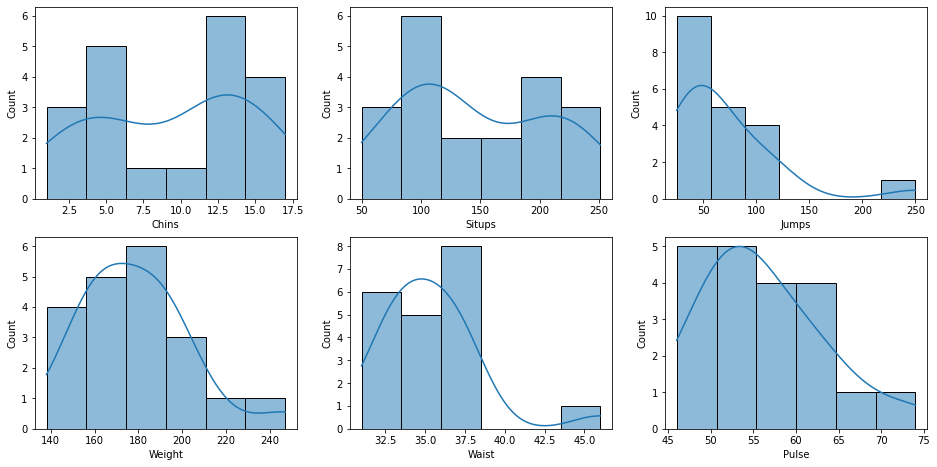

In [3]:
plt.rcParams["figure.figsize"] = [16, 12]
for i, column in enumerate(df.columns, 1):
    plt.subplot(3,3,i)
    sns.histplot(df[column], kde=True)

In [4]:
# Apply a power transform featurewise to make data more Gaussian-like.
# Feature Scaling
scaler = PowerTransformer(method='box-cox')

df_scaled = scaler.fit_transform(df.to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=[
  'Weight', 'Waist', 'Pulse', 'Chins', 'Situps', 'Jumps'])
 
print("Scaled Dataset Using PowerTransformer")
df_scaled.head()

Scaled Dataset Using PowerTransformer


,Weight,Waist,Pulse,Chins,Situps,Jumps
0,-0.813411,0.372700,0.201034,0.645985,0.444944,-0.895918
1,-1.505320,-0.491812,0.201034,0.570281,0.763878,-0.509100
2,0.528904,-0.662761,1.053417,0.719953,1.039578,0.438833
3,0.528904,-0.585802,-0.877650,-0.656734,0.074499,0.935256
4,0.704617,0.266171,0.135448,0.570281,0.074499,-1.811332


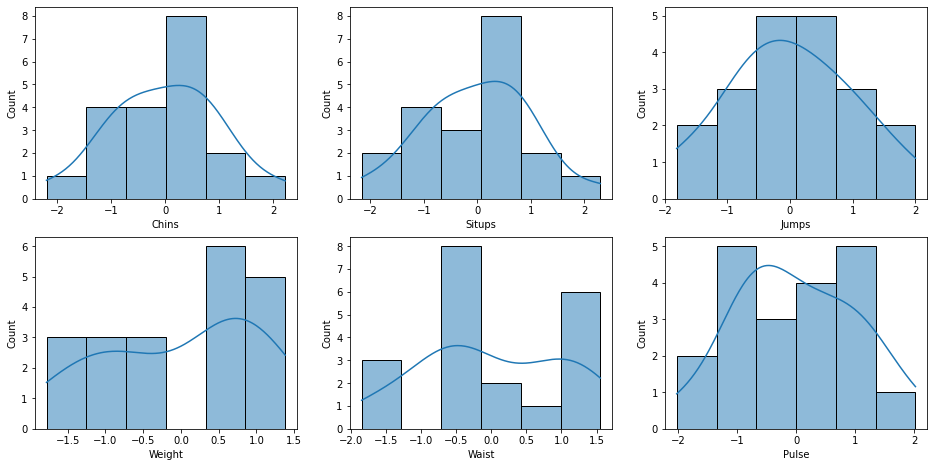

In [5]:
plt.rcParams["figure.figsize"] = [16, 12]
for i, column in enumerate(df.columns, 1):
    plt.subplot(3,3,i)
    sns.histplot(df_scaled[column], kde=True)

#### Task 2 (4 points):  
2. Dimensionality reduction
    - Load 20 News Dataset
          from sklearn.datasets import fetch_20newsgroups_vectorized
          data = fetch_20newsgroups_vectorized(subset='train')
    - Use KernelPCA for dimensionality reduction. Train a classifier at different nr of dimensions, check how model score changes with dimensions
          Remember that you can load training and testing subsets of data!

#### Task 3 (8 points):

3. Clustering
    - Cluster 20 News Dataset into 20 clusters. Print true class vs cluster distribution. 
          Did you manage to recover the original clusters?  (give students an example plot)

20 News Groups dataset

In [2]:
from sklearn.datasets import fetch_20newsgroups_vectorized
data = fetch_20newsgroups_vectorized(subset='train')
X = data['data']
Y = data['target']

Printing classes and their predictions

In [3]:
Y = data['target']

# some generated clusters
Clusters = Y.copy()
Clusters[:3000] = 3

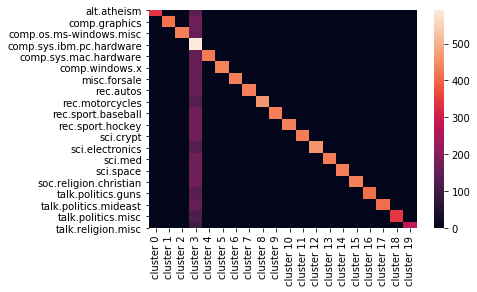

In [5]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

cm = confusion_matrix(Y, Clusters)
sn.heatmap(cm, yticklabels=data['target_names'], 
           xticklabels=["cluster {}".format(i) for i in range(20)])